<a href="https://colab.research.google.com/github/yando6/Tugas1/blob/main/2109116033_Posttest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Nama : Bagus Nur Fajar Riski
### NIM : 2109116033

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [46]:
import pandas as pd
import seaborn as sns

In [47]:
df = pd.read_csv("dataset_market_basket.csv")
# Untuk baca Dataset - sheet 1
df

,whole milk,pastry,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegatables,canned beer,misc. beverages,...,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df.sum()
df.columns
# 2 Item set
from itertools import permutations #Library untuk buat kombinasi barang

# Extract unique items.
rules = list(permutations(df.columns, 2))
rules

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'pickled vegatables'),
 ('whole milk', 'canned beer'),
 ('whole milk', 'misc. beverages'),
 ('whole milk', 'hygiene articles'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'frankfurter'),
 ('whole milk', 'whipped/sour cream'),
 ('whole milk', 'curd'),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', 'frozen vegetables'),
 ('whole milk', 'other vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', 'sugar'),
 ('whole milk', 'butter milk'),
 ('whole milk', 'specialty chocolate'),
 ('whole milk', 'frozen meals'),
 ('whole milk', 'dental care'),
 ('whole milk', 'root vegetables'),
 ('whole milk', 'detergent'),
 ('whole milk', 'dish cleaner'),
 ('whole milk', 'cling film/bags'),
 ('pastry', 'whole milk'),
 ('pastry', 'salty snack'),
 ('

In [49]:
# Filter yang ada item kombinasi yang muncul aja yang dihitung
rule_baru = []
for rule in rules:
  # Memfilter dengan nama kolom
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0:
    rule_baru.append(rule)
rule_baru

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'butter'),
 ('pastry', 'whole milk'),
 ('pastry', 'salty snack'),
 ('salty snack', 'whole milk'),
 ('salty snack', 'pastry'),
 ('sausage', 'whole milk'),
 ('sausage', 'semi-finished bread'),
 ('sausage', 'yogurt'),
 ('sausage', 'hygiene articles'),
 ('sausage', 'rolls/buns'),
 ('semi-finished bread', 'whole milk'),
 ('semi-finished bread', 'sausage'),
 ('semi-finished bread', 'yogurt'),
 ('yogurt', 'whole milk'),
 ('yogurt', 'sausage'),
 ('yogurt', 'semi-finished bread'),
 ('soda', 'whole milk'),
 ('soda', 'pickled vegatables'),
 ('soda', 'frankfurter'),
 ('soda', 'whipped/sour cream'),
 ('pickled vegatables', 'soda'),
 ('canned beer', 'misc. beverages'),
 ('misc. beverages', 'canned beer'),
 ('hygiene articles', 'sausage'),
 ('rolls/buns', 'whole milk'),
 ('rolls

In [50]:
hitung = {} #Ganti dictionary
for rule in rule_baru:
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1)
      ])
  hitung[str(rule)] = banyak_data

hitung

{"('whole milk', 'pastry')": 1,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'sausage')": 2,
 "('whole milk', 'semi-finished bread')": 1,
 "('whole milk', 'yogurt')": 1,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'rolls/buns')": 1,
 "('whole milk', 'butter')": 1,
 "('pastry', 'whole milk')": 1,
 "('pastry', 'salty snack')": 1,
 "('salty snack', 'whole milk')": 1,
 "('salty snack', 'pastry')": 1,
 "('sausage', 'whole milk')": 2,
 "('sausage', 'semi-finished bread')": 1,
 "('sausage', 'yogurt')": 1,
 "('sausage', 'hygiene articles')": 1,
 "('sausage', 'rolls/buns')": 2,
 "('semi-finished bread', 'whole milk')": 1,
 "('semi-finished bread', 'sausage')": 1,
 "('semi-finished bread', 'yogurt')": 1,
 "('yogurt', 'whole milk')": 1,
 "('yogurt', 'sausage')": 1,
 "('yogurt', 'semi-finished bread')": 1,
 "('soda', 'whole milk')": 1,
 "('soda', 'pickled vegatables')": 1,
 "('soda', 'frankfurter')": 1,
 "('soda', 'whipped/sour cream')": 1,
 "('pickled vegatables', 'soda')": 1,
 "('can

In [51]:
len(df)

19

In [52]:
print("---")
for item,ab in hitung.items():
  print(f"{item} support = {ab/len(df)*100}%")

---
('whole milk', 'pastry') support = 5.263157894736842%
('whole milk', 'salty snack') support = 5.263157894736842%
('whole milk', 'sausage') support = 10.526315789473683%
('whole milk', 'semi-finished bread') support = 5.263157894736842%
('whole milk', 'yogurt') support = 5.263157894736842%
('whole milk', 'soda') support = 5.263157894736842%
('whole milk', 'rolls/buns') support = 5.263157894736842%
('whole milk', 'butter') support = 5.263157894736842%
('pastry', 'whole milk') support = 5.263157894736842%
('pastry', 'salty snack') support = 5.263157894736842%
('salty snack', 'whole milk') support = 5.263157894736842%
('salty snack', 'pastry') support = 5.263157894736842%
('sausage', 'whole milk') support = 10.526315789473683%
('sausage', 'semi-finished bread') support = 5.263157894736842%
('sausage', 'yogurt') support = 5.263157894736842%
('sausage', 'hygiene articles') support = 5.263157894736842%
('sausage', 'rolls/buns') support = 10.526315789473683%
('semi-finished bread', 'whole 

In [53]:
print("---")
for item,ab in hitung.items():
  #"A->B"
  i = eval(item) #Ubah ke list dari string
  print(f"{i[0]}->{i[1]}  Confidence = {ab/df[i[0]].sum()*100}%")

---
whole milk->pastry  Confidence = 20.0%
whole milk->salty snack  Confidence = 20.0%
whole milk->sausage  Confidence = 40.0%
whole milk->semi-finished bread  Confidence = 20.0%
whole milk->yogurt  Confidence = 20.0%
whole milk->soda  Confidence = 20.0%
whole milk->rolls/buns  Confidence = 20.0%
whole milk->butter  Confidence = 20.0%
pastry->whole milk  Confidence = 100.0%
pastry->salty snack  Confidence = 100.0%
salty snack->whole milk  Confidence = 100.0%
salty snack->pastry  Confidence = 100.0%
sausage->whole milk  Confidence = 50.0%
sausage->semi-finished bread  Confidence = 25.0%
sausage->yogurt  Confidence = 25.0%
sausage->hygiene articles  Confidence = 25.0%
sausage->rolls/buns  Confidence = 50.0%
semi-finished bread->whole milk  Confidence = 100.0%
semi-finished bread->sausage  Confidence = 100.0%
semi-finished bread->yogurt  Confidence = 100.0%
yogurt->whole milk  Confidence = 100.0%
yogurt->sausage  Confidence = 100.0%
yogurt->semi-finished bread  Confidence = 100.0%
soda->w

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

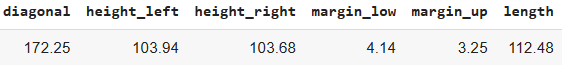
<!-- 1412 -->

In [54]:
# 1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi
import pandas as pd
import math

# dataset
data = pd.read_csv('deteksi_uang_palsu.csv')

# data target prediksi
target = [172.25, 103.94, 103.68, 4.14, 3.25, 112.48]

# hitung jarak Euclidean untuk setiap data pada dataset
jarak = []
for i in range(len(data)):
    dist = 0
    for j in range(1, len(data.columns)):
        dist += (data.iloc[i,j] - target[j-1])**2
    jarak.append(math.sqrt(dist))

# tambahkan kolom jarak pada dataset
data['jarak'] = jarak

# tampilkan hasil
data

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,jarak
0,True,172.06,104.24,103.66,4.24,3.10,113.02,0.671267
1,True,171.66,103.68,103.41,4.35,3.33,113.74,1.458321
2,True,172.23,104.00,103.35,4.43,2.95,113.12,0.834626
3,True,172.07,104.21,103.82,4.29,3.35,113.30,0.910934
4,True,171.79,104.57,104.04,4.26,3.15,113.46,1.312593
5,False,172.00,104.23,104.52,5.76,3.37,110.94,2.421281
6,False,171.56,104.03,103.93,5.47,3.50,111.67,1.741896
7,False,171.90,104.33,104.40,4.70,3.31,112.12,1.113463
8,False,171.84,104.06,104.10,4.87,3.25,111.04,1.722034
9,False,172.11,104.14,104.15,4.84,3.28,110.98,1.738217


In [55]:
# 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)
import pandas as pd
import math

# Membaca data
df = pd.read_csv("deteksi_uang_palsu.csv")

# Menambahkan kolom jarak untuk setiap data terhadap target prediksi
target = [172.25, 103.94, 103.68, 4.14, 3.25, 112.48]
df["jarak"] = ((df.diagonal - target[0])**2 + 
               (df.height_left - target[1])**2 +
               (df.height_right - target[2])**2 +
               (df.margin_low - target[3])**2 +
               (df.margin_up - target[4])**2 +
               (df.length - target[5])**2)**0.5

# Mengurutkan data berdasarkan jarak terdekat
k = int(math.sqrt(len(df)))
sorted_df = df.sort_values(by=["jarak"]).head(k)

# Menampilkan hasil pengurutan
sorted_df


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,jarak
0,True,172.06,104.24,103.66,4.24,3.10,113.02,0.671267
2,True,172.23,104.00,103.35,4.43,2.95,113.12,0.834626
3,True,172.07,104.21,103.82,4.29,3.35,113.30,0.910934


In [56]:
# 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak
import pandas as pd

# Load dataset
data = pd.read_csv("deteksi_uang_palsu.csv")

# Target prediksi
target = [172.25, 103.94, 103.68, 4.14, 3.25, 112.48]

# Hitung jarak Euclidean
data["jarak"] = (((data["diagonal"]-target[0])**2)+((data["height_left"]-target[1])**2)+((data["height_right"]-target[2])**2)+((data["margin_low"]-target[3])**2)+((data["margin_up"]-target[4])**2)+((data["length"]-target[5])**2))**(1/2)

# Urutkan data berdasarkan jarak terdekat
k = round(len(data)**0.5)  # K = akar 2 dari banyak data
data = data.sort_values("jarak")[:k]

# Tentukan hasil prediksi berdasarkan label terbanyak
prediksi = data["is_genuine"].value_counts().idxmax()
print("Hasil prediksi:", prediksi)


Hasil prediksi: True


# (3) Analisis

> Nama : Bagus Nur Fajar Riski

> Nim : 2109116033

> Judul : Supermart Grocery Sales - Retail Analytics Dataset

> Sumber : https://www.kaggle.com/datasets/mohamedharris/supermart-grocery-sales-retail-analytics-dataset

The Supermart Grocery Sales dataset adalah kumpulan data yang terkait dengan penjualan barang belanjaan di supermarket. Dataset ini kemungkinan besar mencakup informasi tentang produk yang dijual, harga produk tersebut, tanggal dan waktu penjualan, dan kemungkinan informasi tentang pelanggan yang melakukan pembelian tersebut.

Memahami kumpulan data ini dapat berguna untuk berbagai tujuan bisnis, termasuk:

1. Manajemen inventaris: Dengan menganalisis data penjualan, bisnis dapat memperoleh wawasan tentang produk mana yang paling populer di kalangan pelanggan dan barang mana yang laris manis. Informasi ini dapat membantu bisnis membuat keputusan yang tepat tentang manajemen inventaris, termasuk produk mana yang harus dipesan, berapa banyak inventaris yang harus disimpan, dan kapan harus memesan ulang barang.

2. Strategi penetapan harga: Dengan menganalisis data penjualan, bisnis dapat memperoleh wawasan tentang produk mana yang diberi harga yang tepat dan produk mana yang mungkin terlalu mahal atau terlalu murah. Informasi ini dapat membantu bisnis menyesuaikan strategi penetapan harga untuk memaksimalkan penjualan dan profitabilitas.

3. Segmentasi pelanggan: Dengan menganalisis data penjualan, bisnis dapat memperoleh wawasan tentang perilaku dan preferensi pelanggan. Informasi ini dapat digunakan untuk mengelompokkan pelanggan ke dalam kelompok-kelompok yang berbeda berdasarkan kebiasaan membeli, demografi, dan faktor lainnya, yang dapat membantu bisnis mengembangkan strategi pemasaran yang ditargetkan.

4. Peramalan: Dengan menganalisis data penjualan historis, bisnis dapat mengembangkan model untuk meramalkan tren penjualan di masa depan. Informasi ini dapat digunakan untuk menginformasikan perencanaan produksi dan inventaris, strategi pemasaran, dan keputusan bisnis lainnya.

Secara keseluruhan, kumpulan data Penjualan Bahan Makanan Supermart memiliki potensi untuk memberikan wawasan berharga ke dalam industri ritel bahan makanan dan dapat digunakan untuk menginformasikan berbagai keputusan bisnis.

Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

#**BUSSINESS UNDERSTANDING**



#**DATA UNDERSTANDING**

## Collect Initial Data

In [ ]:
# Load dataset the dataset into a Pandas dataframe
dfdata = pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')
dfdata

##Describe Data

In [37]:
print("Daftar kolom :")
for col in dfdata.columns:
  print(col)

Daftar kolom :
Order ID
Customer Name
Category
Sub Category
City
Order Date
Region
Sales
Discount
Profit
State


##Explore Data

In [ ]:
import seaborn as sns
sns.countplot(data=dfdata,x="Category")

In [ ]:
sns.countplot(data=dfdata,x="Region")

In [ ]:
sns.histplot(data=dfdata,x="Profit")

In [ ]:
sns.boxplot(data=dfdata,x="Sales")

In [ ]:
sns.scatterplot(data=dfdata,x="Discount",y="Profit")

##Verify Data Quality

In [ ]:
is_duplicated = dfdata.duplicated().any()
print("Status Duplikasi :",is_duplicated)

Status Duplikasi : False


Berdasarkan output di atas, data - data yang pada dataframe tidak memiliki duplikasi data, didukung oleh adanya kolom ID atau identifikasi nasabah agar data - data mereka tidak terlantar, tertukar, terduplikasi, dan masalah lainnya

#**DATA PREPARATION**

##Select Data

In [77]:
dfdata = pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')
dfdata

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


##Clean Data

In [75]:
# Mencari data yang kosong/missing values
dfdata.isna().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

Berdasarkan output di atas, diketahui bahwa tidak terdapat nilai kosong atau nilai N/A pada dataframe sehingga dapat disimpulkan bahwa data sudah clean.